In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from CSV file
df=pd.read_csv(r"C:\Users\varun\OneDrive\Desktop\Oaisis INternship\Project_1\retail_sales_dataset.csv")
#Display top 5 rows of the dataframe
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
#Display bottom 5 rows of the dataframe
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#Check whether there are any duplicates in the dataset
total_duplicates=df.duplicated().sum()
total_duplicates

0

In [123]:
# # Convert 'Date' column to datetime
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   datetime64[ns]
 10  Age_Group         1000 non-null   category      
 11  Day               1000 non-null   object        
dtypes: category(1), datetime64[ns](2), int64(5), object(4)
memory usage: 87.2+ KB


In [124]:
#Sort values on date
df.sort_values(by='Date', inplace=True)

In [125]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age_Group,Day
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,1900-01-01,36-50,Sunday
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,1900-01-01,36-50,Sunday
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1900-01-01,36-50,Sunday
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,1900-01-01,18-35,Monday
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,1900-01-01,18-35,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
994,520,2023-12-29,CUST520,Female,49,Electronics,4,25,100,1900-12-01,36-50,Friday
995,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,1900-12-01,51-65,Friday
997,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,1900-12-01,51-65,Sunday
998,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,1900-01-01,36-50,Monday


In [126]:
#Extracting Month from date column
df['Month']=df['Date'].dt.strftime('%B')
df.reset_index(drop=True,inplace=True)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age_Group,Day
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,January,36-50,Sunday
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,January,36-50,Sunday
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,January,36-50,Sunday
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,January,18-35,Monday
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,January,18-35,Monday


In [127]:
# Categorizing the Age group
bins = [0, 18, 35, 50, 65]
labels = ['<18', '18-35', '36-50', '51-65']

# Use the cut function
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age_Group,Day
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,January,36-50,Sunday
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,January,36-50,Sunday
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,January,36-50,Sunday
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,January,18-35,Monday
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,January,18-35,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
995,520,2023-12-29,CUST520,Female,49,Electronics,4,25,100,December,36-50,Friday
996,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,December,51-65,Friday
997,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,December,51-65,Sunday
998,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,January,36-50,Monday


In [128]:
#Perform Basic Descriptive statistics
average_sales=df['Total Amount'].mean()
median_sales=df['Total Amount'].median()
average_sales,median_sales

(456.0, 135.0)

In [129]:
#Calculate Standard deviation  and variance of sales
var_sales=df['Total Amount'].var()
std_sales=df['Total Amount'].std()
var_sales,std_sales

(313597.34734734736, 559.997631555123)

In [130]:
# Check whether there are any outliers in the dataset
outliers=[]
Q1=df['Total Amount'].quantile(0.25)
Q3=df['Total Amount'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-15*IQR
for i in df.index:
    if df.loc[i,'Total Amount']>upper_bound or df.loc[i,'Total Amount']<lower_bound:
        outliers.append(df.loc[i,'Total Amount'])
len(outliers)        
    

0

In [131]:
#Grouping the data based on Product Category
df.groupby('Product Category').agg({'Total Amount':['mean','sum']})

Total Amount        
                         mean     sum
Product Category                     
Beauty             467.475570  143515
Clothing           443.247863  155580
Electronics        458.786550  156905

In [132]:
#Calculate the number of products purcahsed based on gender
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [133]:
#Calculate the number of products purcahsed based on gender and Product Category
df.groupby(['Product Category','Gender']).agg({'Total Amount':'sum'}).unstack(1).droplevel(level=0,axis=1)

Gender,Female,Male
Product Category,,
Beauty,74830,68685
Clothing,81275,74305
Electronics,76735,80170


In [158]:
#Calculating the total Sales in each month
# Define the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# Sort the DataFrame by the 'Month' column
df = df.sort_values('Month')

# Now group by 'Month' and calculate the total sales
monthly_sales = df.groupby('Month').agg({'Total Amount': 'sum'})
monthly_sales

,Total Amount
Month,
January,36980
February,44060
March,28990
April,33870
May,53150
June,36715
July,35465
August,36960
September,23620


In [175]:
# Creating Day Column using Date Column to visualize customer purchase behaviour on week-days and week-ends
df['Day']=df['Date'].dt.strftime('%A')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age_Group,Day
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,January,36-50,Sunday
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,January,36-50,Sunday
38,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000,January,36-50,Monday
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,January,36-50,Sunday
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,January,18-35,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
995,520,2023-12-29,CUST520,Female,49,Electronics,4,25,100,December,36-50,Friday
996,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,December,51-65,Friday
997,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,December,51-65,Sunday
988,62,2023-12-27,CUST062,Male,18,Beauty,2,50,100,December,18-35,Wednesday


# Data Visualization


array([<Axes: ylabel='Total Amount'>], dtype=object)

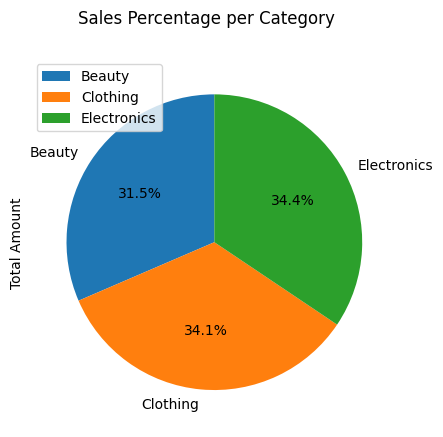

In [37]:
df.groupby('Product Category').agg({'Total Amount':'sum'}).plot(kind='pie',legend=True,startangle=90,title='Sales Percentage per Category',autopct='%1.1f%%',subplots=True)

<Axes: title={'center': 'Comparison of Product Purchases by Gender'}, xlabel='Gender', ylabel='Number of Purchases'>

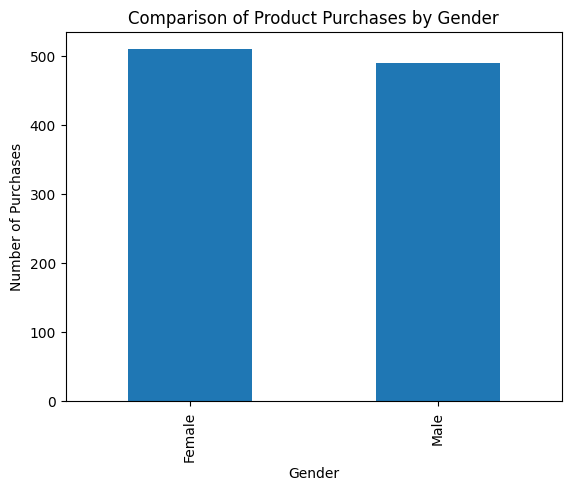

In [38]:
df['Gender'].value_counts().plot(kind='bar',title= 'Comparison of Product Purchases by Gender',ylabel='Number of Purchases',xlabel='Gender')

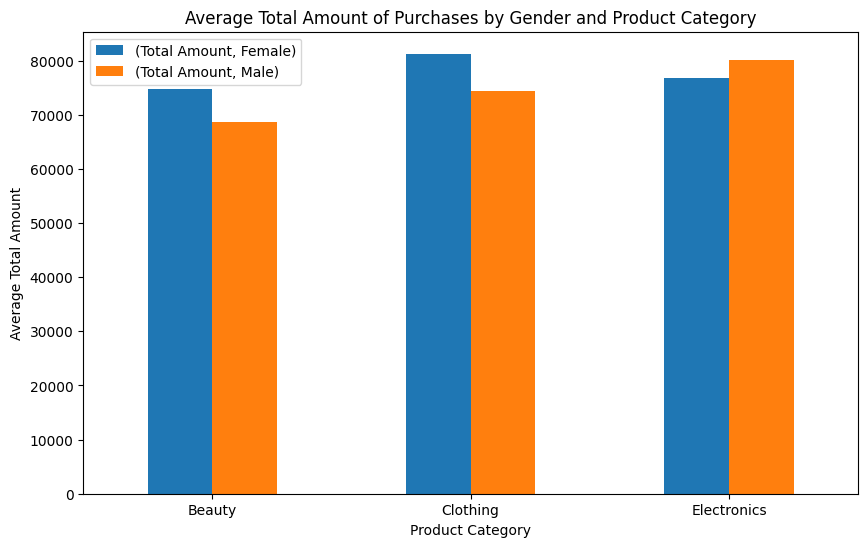

In [95]:
grouped=df.groupby(['Product Category','Gender']).agg({'Total Amount':'sum'})
grouped=grouped.unstack()
ax=grouped.plot(kind='bar',figsize=(10,6))
plt.title('Average Total Amount of Purchases by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels to 0 degrees for better readability

# Move the legend
ax.legend(loc='best')
plt.show()

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

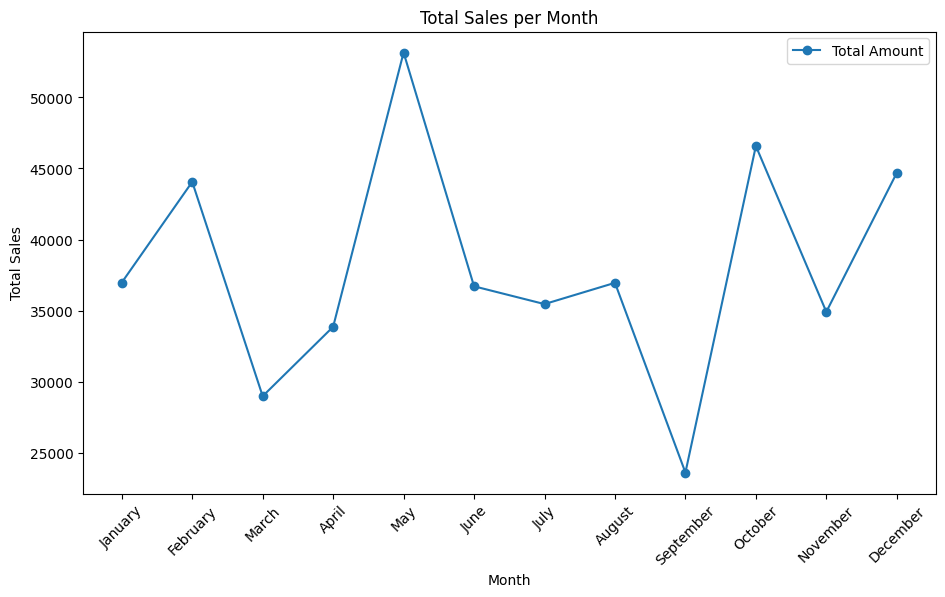

In [177]:
monthly_sales.plot(kind='line',title='Total Sales per Month',xlabel='Month',ylabel='Total Sales',xticks=range(len(monthly_sales.index)),figsize=(11,6),marker='o').set_xticklabels(monthly_sales.index,rotation=45)


<Axes: title={'center': 'Number of Purchases by Age Group'}, xlabel='Age_Group', ylabel='Total Purchases'>

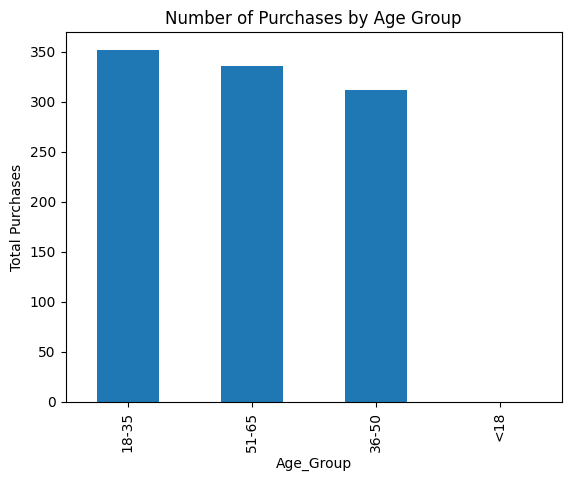

In [54]:
df['Age_Group'].value_counts().plot(kind='bar', ylabel='Total Purchases',xlabel='Age_Group',title='Number of Purchases by Age Group')

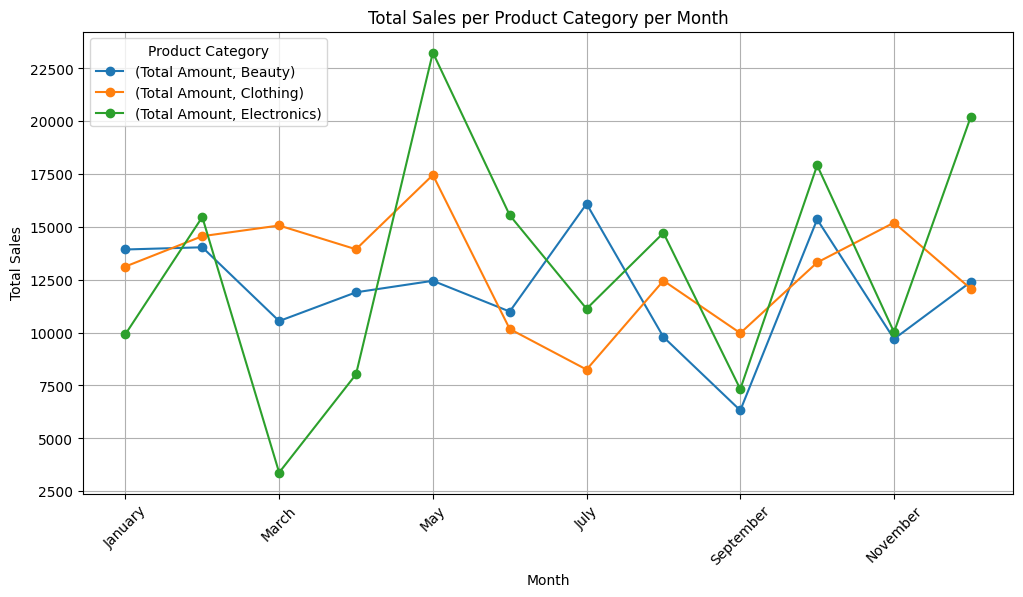

In [191]:
category_sales = df.groupby(['Month', 'Product Category']).agg({'Total Amount': 'sum'}).unstack()

# Reindex to ensure the months are in the correct order
category_sales = category_sales.reindex(months_order)

# Plot the line graph
plt.figure(figsize=(12, 6))
category_sales.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Total Sales per Product Category per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(True)
plt.show()



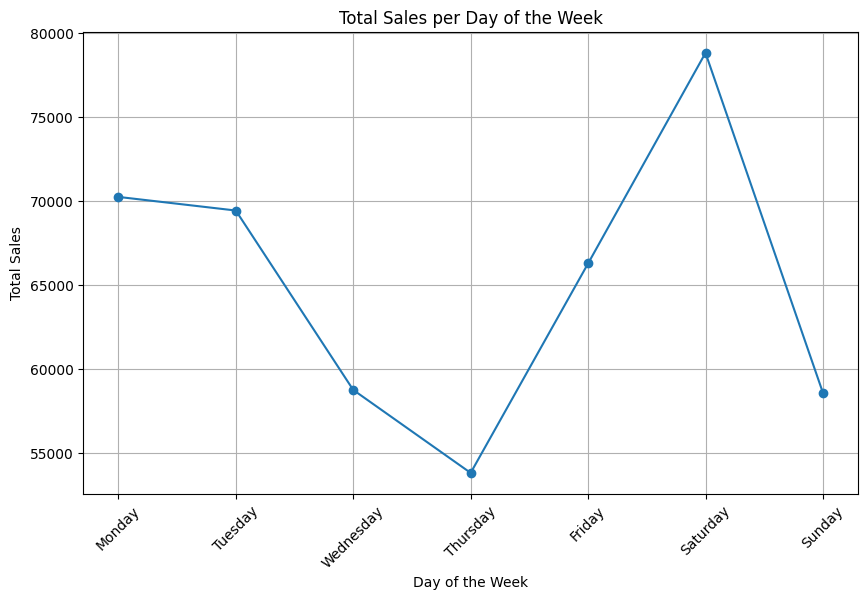

In [119]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by the Day column and aggregate Total Sales
grouped = df.groupby('Day').agg({'Total Amount': 'sum'}).reindex(days_order)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Total Amount'], marker='o')
plt.title('Total Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

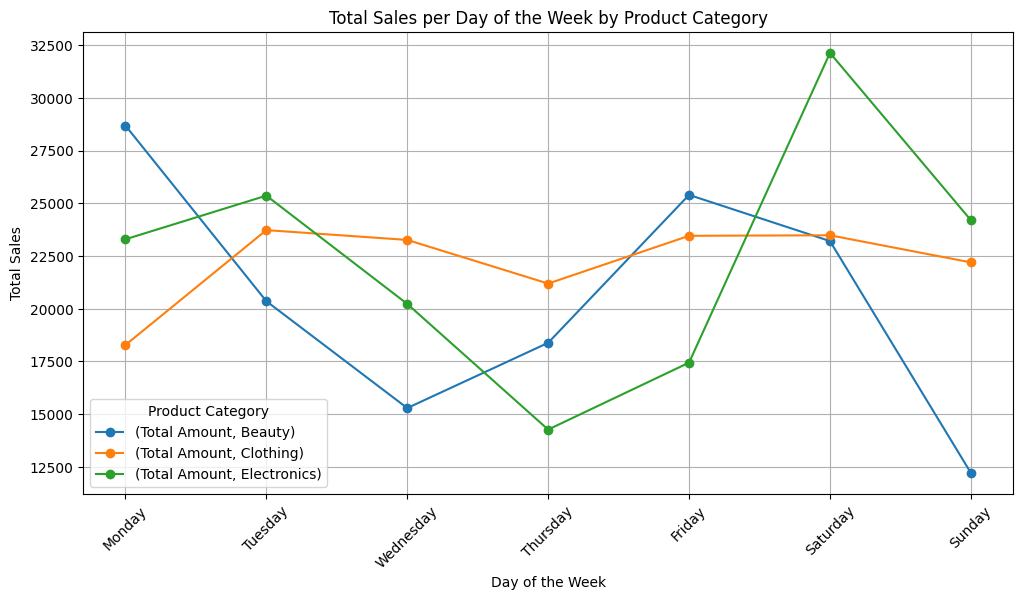

In [91]:
grouped = df.groupby(['Day', 'Product Category']).agg({'Total Amount': 'sum'}).unstack()

# Reindex to ensure the days are in the correct order
grouped = grouped.reindex(days_order)

# Plot the line graph
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Total Sales per Day of the Week by Product Category')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Product Category')
plt.grid(True)
plt.show()